<a href="https://colab.research.google.com/github/shravani-5git/Cognifyz/blob/main/Cognifyz_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Level 1: Task 1**

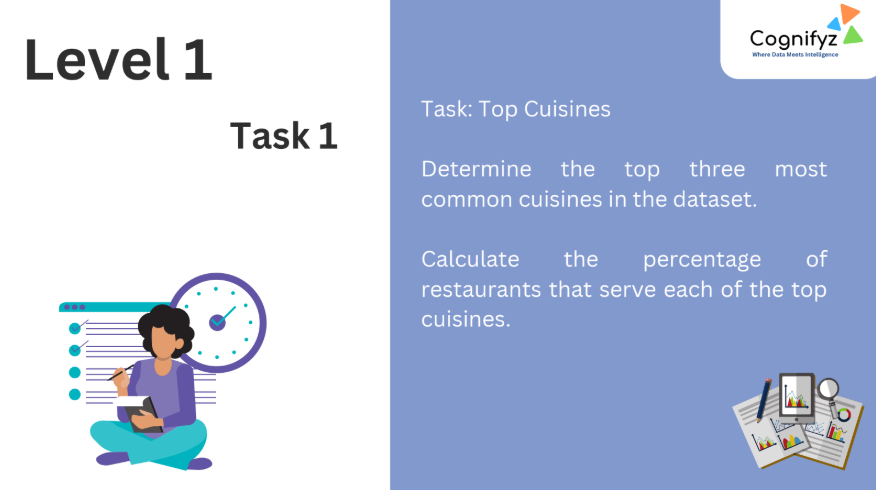

In [ ]:
import pandas as pd
from collections import Counter


In [ ]:
df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df['Cuisines'] = df['Cuisines'].astype(str)


In [ ]:
cuisine_df = pd.DataFrame(
    list(cuisine_counts.items()),
    columns=["Cuisine", "Count"]
).sort_values(by="Count", ascending=False)

cuisine_df.reset_index(drop=True, inplace=True)
cuisine_df


,Cuisine,Count
0,North Indian,3960
1,Chinese,2735
2,Fast Food,1986
3,Mughlai,995
4,Italian,764
...,...,...
141,Cuisine Varies,1
142,Fish and Chips,1
143,Durban,1
144,D�_ner,1


In [ ]:
cuisine_series = (
    df['Cuisines']
    .dropna()
    .astype(str)
    .str.split(',')
    .explode()
    .str.strip()
)

cuisine_counts = cuisine_series.value_counts()
top_n = 3
top_cuisines = cuisine_counts.head(top_n)
result_top3 = pd.DataFrame({
    'Cuisine': top_cuisines.index,
    'Count': top_cuisines.values
}).reset_index(drop=True)
result_top3


,Cuisine,Count
0,North Indian,3960
1,Chinese,2735
2,Fast Food,1986


In [ ]:
total_restaurants = len(df)

percentages = (top_cuisines / total_restaurants) * 100

result = pd.DataFrame({
    'Cuisine': top_cuisines.index,
    'Count': top_cuisines.values,
    'Percentage (%)': percentages.round(2).values
})

result = result.reset_index(drop=True)
result


,Cuisine,Count,Percentage (%)
0,North Indian,3960,41.46
1,Chinese,2735,28.64
2,Fast Food,1986,20.79


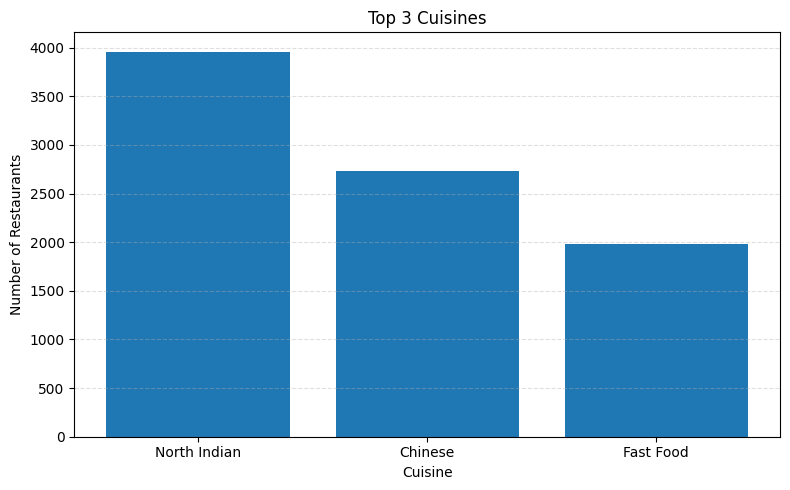

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(result_top3['Cuisine'], result_top3['Count'])
plt.title(f"Top {top_n} Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Level 1: Task 2**

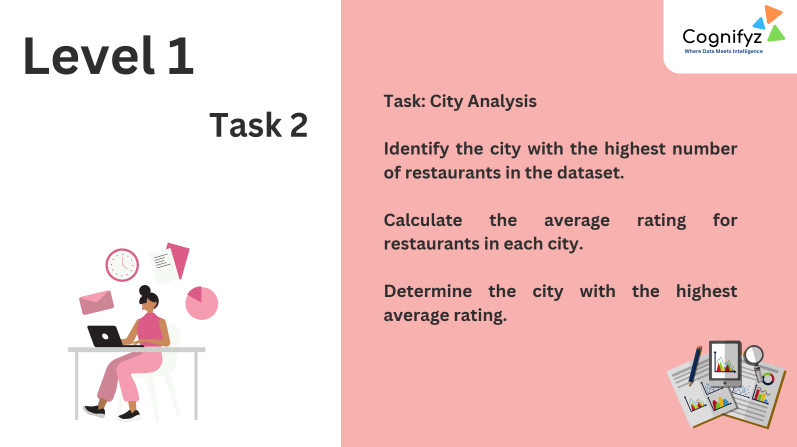

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
print("Columns:", df.columns.tolist())

city_candidates = ['City', 'city', 'CITY', 'City Name', 'City_Name']
rating_candidates = ['Aggregate rating', 'Aggregate_rating', 'Rating', 'rating', 'Average Rating', 'Avg Rating']

city_col = next((c for c in city_candidates if c in df.columns), None)
rating_col = next((c for c in rating_candidates if c in df.columns), None)

if city_col is None:
    raise ValueError("Could not automatically find a city column. Check df.columns and set `city_col` manually.")

if rating_col is None:
    raise ValueError("Could not automatically find a rating column. Check df.columns and set `rating_col` manually.")

print("Using city column:", city_col)
print("Using rating column:", rating_col)


Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Using city column: City
Using rating column: Aggregate rating


In [ ]:
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

print("Rating column stats (after conversion):")
print(df[rating_col].describe())

print("Missing ratings:", df[rating_col].isna().sum())
print("Unique cities:", df[city_col].nunique())


Rating column stats (after conversion):
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64
Missing ratings: 0
Unique cities: 141


a) Identify the city with the highest number of restaurants in the dataset.

In [ ]:
city_counts = df[city_col].dropna().value_counts()

city_counts_head = city_counts.head(20)  # top 20 preview
print("Top cities by number of restaurants:")
print(city_counts_head)

top_city_by_count = city_counts.idxmax()
top_city_count = city_counts.max()

print(f"\nCity with the highest number of restaurants: {top_city_by_count} ({top_city_count} restaurants)")


Top cities by number of restaurants:
City
New Delhi          5473
Gurgaon            1118
Noida              1080
Faridabad           251
Ghaziabad            25
Bhubaneshwar         21
Lucknow              21
Ahmedabad            21
Amritsar             21
Guwahati             21
Rio de Janeiro       20
Bras�_lia            20
Albany               20
Doha                 20
Cape Town            20
Manchester           20
London               20
Edinburgh            20
Birmingham           20
Wellington City      20
Name: count, dtype: int64

City with the highest number of restaurants: New Delhi (5473 restaurants)


b) Calculate the average rating for restaurants in each city.

In [ ]:
min_restaurants = 5
city_stats = (
    df.groupby(city_col)
      .agg(
          Avg_Rating = (rating_col, 'mean'),
          Restaurant_Count = (rating_col, 'count')
      )
      .reset_index()
)
city_stats_filtered = city_stats[city_stats['Restaurant_Count'] >= min_restaurants].copy()
top_by_count_df = (
    city_stats_filtered
    .sort_values('Restaurant_Count', ascending=False)
    .head(10)
)

top_by_avg_rating_df = (
    city_stats_filtered
    .sort_values('Avg_Rating', ascending=False)
    .head(10)
)

print("Top cities by restaurant count (top 10):")
display(top_by_count_df)

print("\nTop cities by average rating (top 10):")
display(top_by_avg_rating_df)


Top cities by restaurant count (top 10):


,City,Avg_Rating,Restaurant_Count
88,New Delhi,2.438845,5473
50,Gurgaon,2.651431,1118
89,Noida,2.036204,1080
43,Faridabad,1.866932,251
48,Ghaziabad,2.852000,25
51,Guwahati,4.190476,21
69,Lucknow,4.195238,21
17,Bhubaneshwar,3.980952,21
2,Ahmedabad,4.161905,21
5,Amritsar,3.685714,21



Top cities by average rating (top 10):


,City,Avg_Rating,Restaurant_Count
67,London,4.535000,20
91,Orlando,4.475000,20
110,Rest of Hawaii,4.410000,20
124,Tampa Bay,4.410000,20
14,Bangalore,4.375000,20
39,Dubai,4.370000,20
59,Jakarta,4.356250,16
54,Hyderabad,4.344444,18
26,Chennai,4.315000,20
6,Ankara,4.305000,20


c) Determine the city with the highest average rating.

In [ ]:
top_city_by_avg_rating = city_stats_filtered.sort_values(
    'Avg_Rating', ascending=False
).head(1)

print("City with the highest average rating:")
display(top_city_by_avg_rating)


City with the highest average rating:


,City,Avg_Rating,Restaurant_Count
67,London,4.535,20


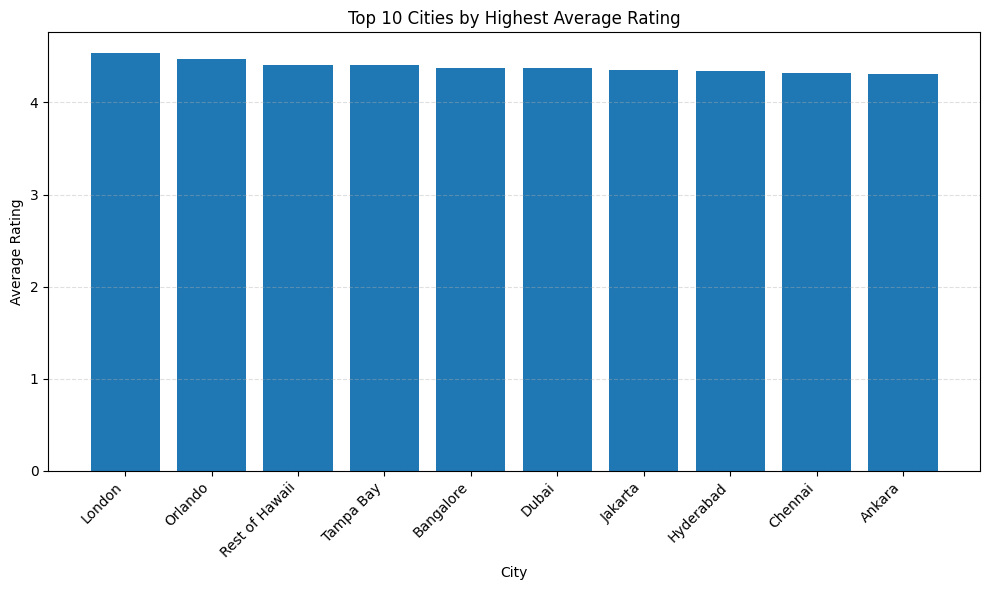

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top_by_avg_rating_df[city_col], top_by_avg_rating_df['Avg_Rating'])

plt.title("Top 10 Cities by Highest Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# **Level 1: Task 3**

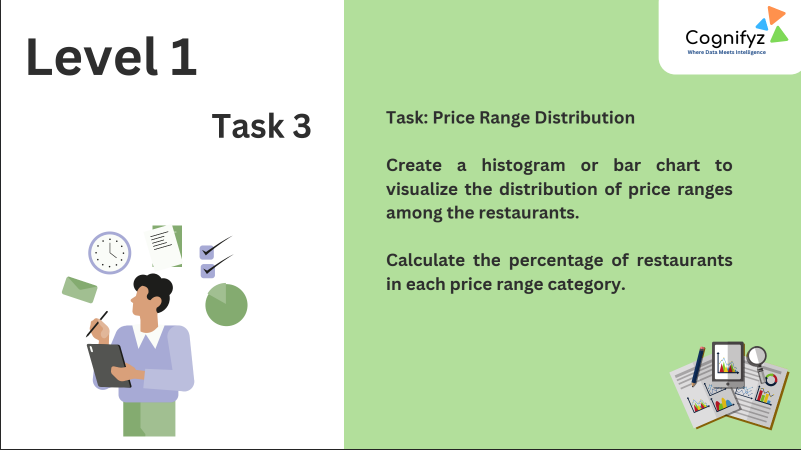

In [ ]:
print("Columns:", df.columns.tolist())
price_candidates = ['Price range', 'Price Range', 'price_range', 'Price', 'PriceRange']
price_col = next((c for c in price_candidates if c in df.columns), None)
if price_col is None:
    raise ValueError("Price range column not found. Check df.columns and set price_col manually.")
print("Using price column:", price_col)


Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Using price column: Price range


In [ ]:
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

print("Price Range stats:")
print(df[price_col].describe())

print("Missing price values:", df[price_col].isna().sum())
print("Unique price ranges:", df[price_col].unique())


Price Range stats:
count    9551.000000
mean        1.804837
std         0.905609
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64
Missing price values: 0
Unique price ranges: [3 4 2 1]


In [ ]:
total = len(df)

price_percentages = (price_counts / total) * 100
price_percentages = price_percentages.round(2)

result_price = pd.DataFrame({
    'Price Range': price_counts.index,
    'Count': price_counts.values,
    'Percentage (%)': price_percentages.values
})

display(result_price)


,Price Range,Count,Percentage (%)
0,1,4444,46.53
1,2,3113,32.59
2,3,1408,14.74
3,4,586,6.14


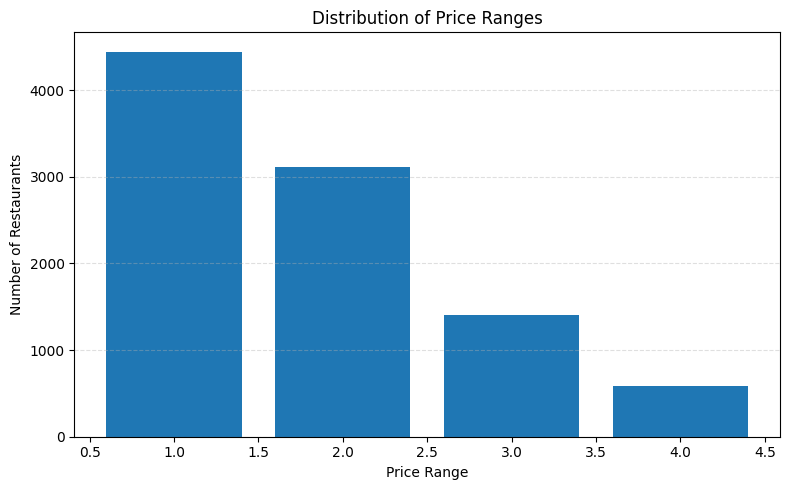

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(result_price['Price Range'], result_price['Count'])
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# **Level 1 : Task 4**

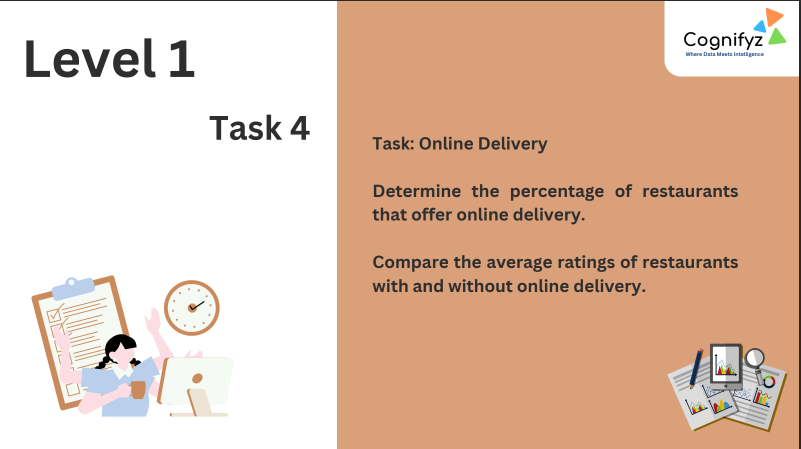

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


a) Determine the percentage of restaurants that offer online delivery.

In [ ]:
online_delivery_counts = df['Has Online delivery'].value_counts()
online_delivery_percentage = (online_delivery_counts / len(df)) * 100
print("Number of Restaurants (Online Delivery):")
print(online_delivery_counts)
print("\nPercentage of Restaurants (Online Delivery):")
print(online_delivery_percentage.round(2))


Number of Restaurants (Online Delivery):
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

Percentage of Restaurants (Online Delivery):
Has Online delivery
No     74.34
Yes    25.66
Name: count, dtype: float64


b) Compare average ratings for restaurants with vs without online delivery

In [ ]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

avg_rating_delivery = (
    df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
)

avg_rating_no_delivery = (
    df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()
)

print("Average Rating (With Online Delivery):", round(avg_rating_delivery, 2))
print("Average Rating (Without Online Delivery):", round(avg_rating_no_delivery, 2))


Average Rating (With Online Delivery): 3.25
Average Rating (Without Online Delivery): 2.47


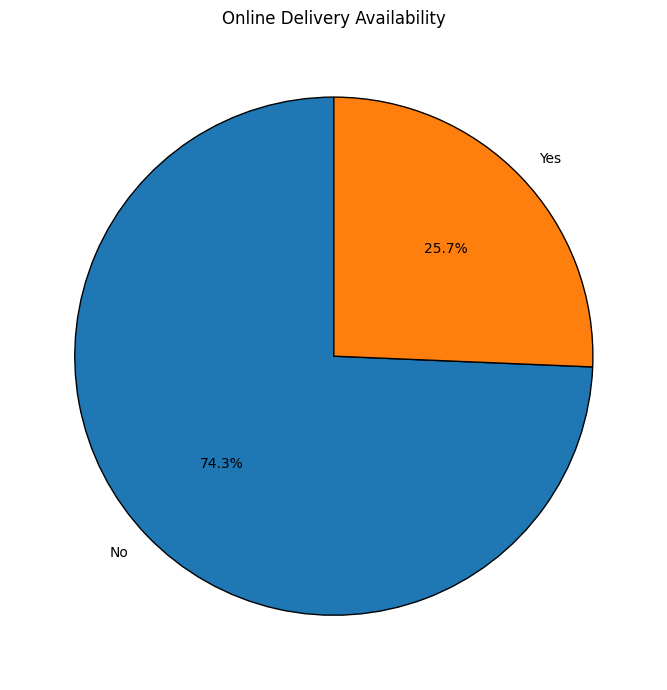

In [ ]:
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.strip()
delivery_counts = df['Has Online delivery'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(
    delivery_counts,
    labels=delivery_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Online Delivery Availability")
plt.tight_layout()
plt.show()
